# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [54]:
df=pd.read_csv(r"C:\Users\yaksh\OneDrive\Desktop\programing\ML\kaggle data\bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [55]:
df.shape

(13320, 9)

Here we can see that there are 13320 rows and 9 columns and there are few unwanted columns which should be removed for running a good Machine Learning Model

# Data Cleaning

In [56]:
df1=df.drop(columns=['availability','area_type','society','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Here the unwanted columns are 'avaliability','area_type','society',balcony' which does not have any importance in the prediction of house prices according to the preactical findings so these columns are removed and the remaining columns are kept in df1

NULL VALUES

In [57]:
df1.isnull().sum()
# we can see that the null values are very negligible compared to the size of the dataset so lets remove all the null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [58]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Let us go through columns and find the information of those columns. So now we will go through size column

In [59]:
df2['size'].unique()
# Here we can see that few are bedroom and few are bhk so let us make nedrooms into int type

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [60]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

C:\Users\yaksh\AppData\Local\Temp\ipykernel_16928\2945642357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [61]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

Let us go through the total_sqft column and find if we can get any information from that column

In [62]:
df2['total_sqft'].unique()
# we can see that there are a range of values given so lets finnd how many rows are there such that

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [63]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [64]:
range_df=df2[df2['total_sqft'].apply(is_float)]
range_df

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [65]:
# There are almost 190 rows with these so let us make th average of the maximum value and the minimum value
def average(x):
    tokens=x.split('-')
    if tokens==2:
        return ((float(tokens[0]))+(float(tokens[1])))/2
    try:
        float(x)
    except:
        return None
    return float(x)

In [66]:
df2['total_sqft']=df2['total_sqft'].apply(average)
df2.head()

C:\Users\yaksh\AppData\Local\Temp\ipykernel_16928\3985726047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']=df2['total_sqft'].apply(average)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [67]:
# Now let us find the price of each sqft i.e price_per_sqft
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

C:\Users\yaksh\AppData\Local\Temp\ipykernel_16928\2467441827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [68]:
df3=df2.copy()

Now lets go into the location column and see that if there are any changes to make in that column

In [69]:
len(df3['location'].unique())
# Here we can see that we have 1304 unique locatoins which makes 1304 unique columns after the encoding hte data which makes
# the data messy.

1304

In [70]:
df3['location']=df3['location'].apply(lambda x:x.strip())

In [71]:
location_count=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_count

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [72]:
location_count_lessthan_10=location_count[location_count<=10]
location_count_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [73]:
df3['location']=df3['location'].apply(lambda x:'other' if x in location_count_lessthan_10 else x)
len(df3['location'].unique())
# Here we can see that the number of unique columns are 242 which mean we will be having 242 unique columns rather than 1304 
# which makes our data easier to encode and handle

242

In [74]:
df4=df3.copy()
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


We have a threshold that the ratio of total_sqft per bhk should be greater than 300 now lets make a column that gives the value of total swft per bhk

In [75]:
df4['total_sqft_per_bhk']=df4['total_sqft']/df4['bhk']


In [76]:
df5=df4.copy()
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,total_sqft_per_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0


In [77]:
df5=df5[df5['total_sqft_per_bhk']>=300]

In [78]:
df5.shape

(12312, 8)

In [79]:
df6=df5.drop(columns=['total_sqft_per_bhk'],axis='columns')

In [80]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [81]:
# Lets go through the price per sqft column
df6['price_per_sqft'].describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

We know that depending upon the location there will be a change in the price per sqft but we can also find some of the outliers in the price of sqft in each location so we should find the mean and std for each location and remove the outliers from each column and then concatenate with an new dataframe so that we can remove the outliers

In [82]:
def price_per_sqft_cleaner(df):
    cleaned_df=pd.DataFrame()
    for area,areadf in df.groupby('location'):
        m=np.mean(areadf['price_per_sqft'])
        sd=np.std(areadf['price_per_sqft'])
        reduced_df=areadf[(areadf['price_per_sqft']>(m-sd))&(areadf['price_per_sqft']<(m+sd))]
        cleaned_df=pd.concat([cleaned_df,reduced_df],ignore_index=True)
    return cleaned_df

In [83]:
df7=price_per_sqft_cleaner(df6)
df7.shape

(10140, 7)

In some areas there are 2bhk which are costlier than 3bhk such that we can determine them as outliers

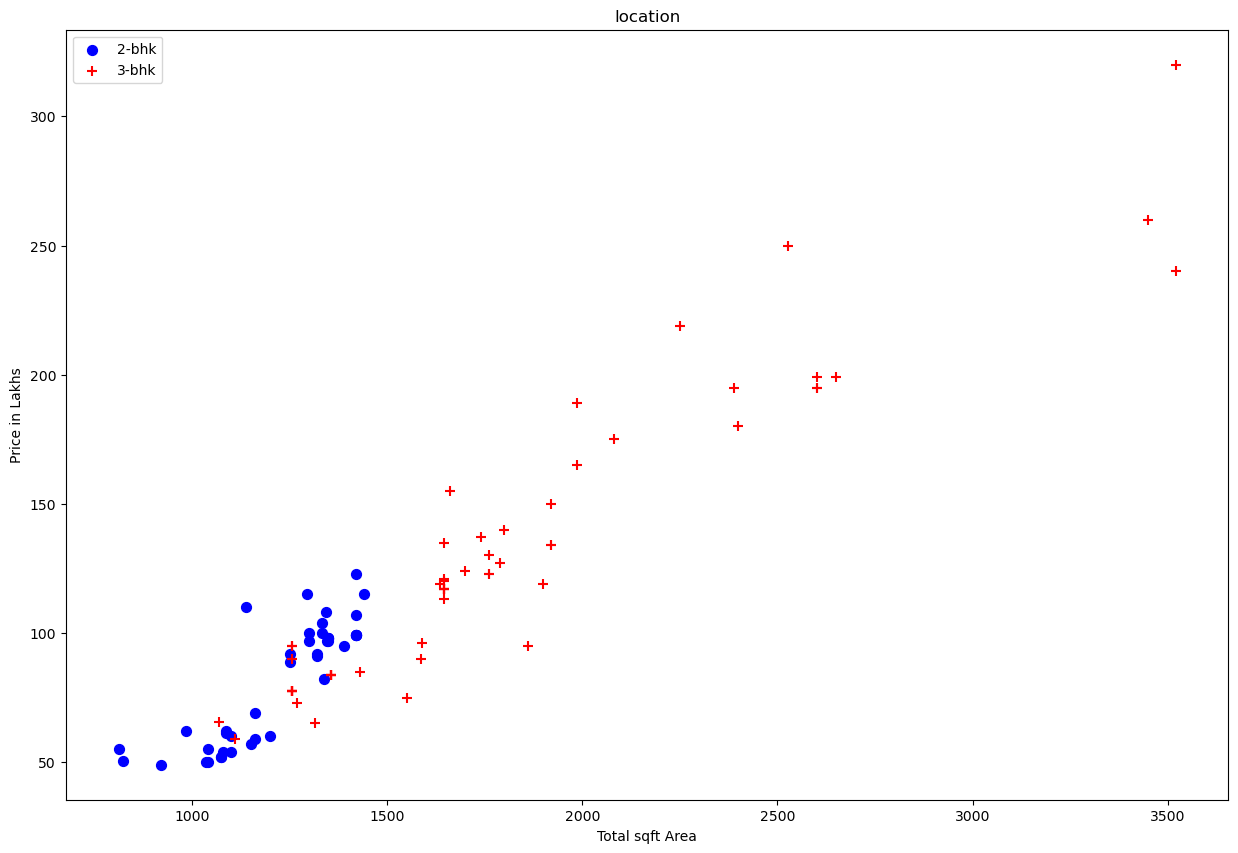

In [84]:
def scatter_plot(df,location):
    bhk2=df[(df['location']==location)&(df['bhk']==2)]
    bhk3=df[(df['location']==location)&(df['bhk']==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2-bhk',s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+',color='red',label='3-bhk',s=50)
    plt.xlabel('Total sqft Area')
    plt.ylabel('Price in Lakhs')
    plt.title('location')
    plt.legend()
scatter_plot(df7,"Hebbal")


Here we can clearly observe that at some areas for same sqft the cost of 2bhk is higher than cost of 3bhk which can be treated as outliers so we can a ratio of cost to bhk for each location and remove the outliers for each location

In [85]:
df8=df7.copy()

In [86]:
df8['price_per_bhk']=df8['price']/df8['bhk']
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,107.000000
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,64.666667
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,78.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,43.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,74.000000


In [87]:
def cleaner(df):
    cleaned_df=pd.DataFrame()
    for area,areadf in df.groupby('location'):
        m=np.mean(areadf['price_per_bhk'])
        sd=np.std(areadf['price_per_bhk'])
        reduced_df=df[(df['price_per_bhk']>(m-sd))&(df['price_per_bhk']<(m+sd))]
    cleaned_df=pd.concat([cleaned_df,reduced_df],ignore_index=True)
    return cleaned_df

In [88]:
df9=cleaner(df8)
df9.shape

(9476, 8)

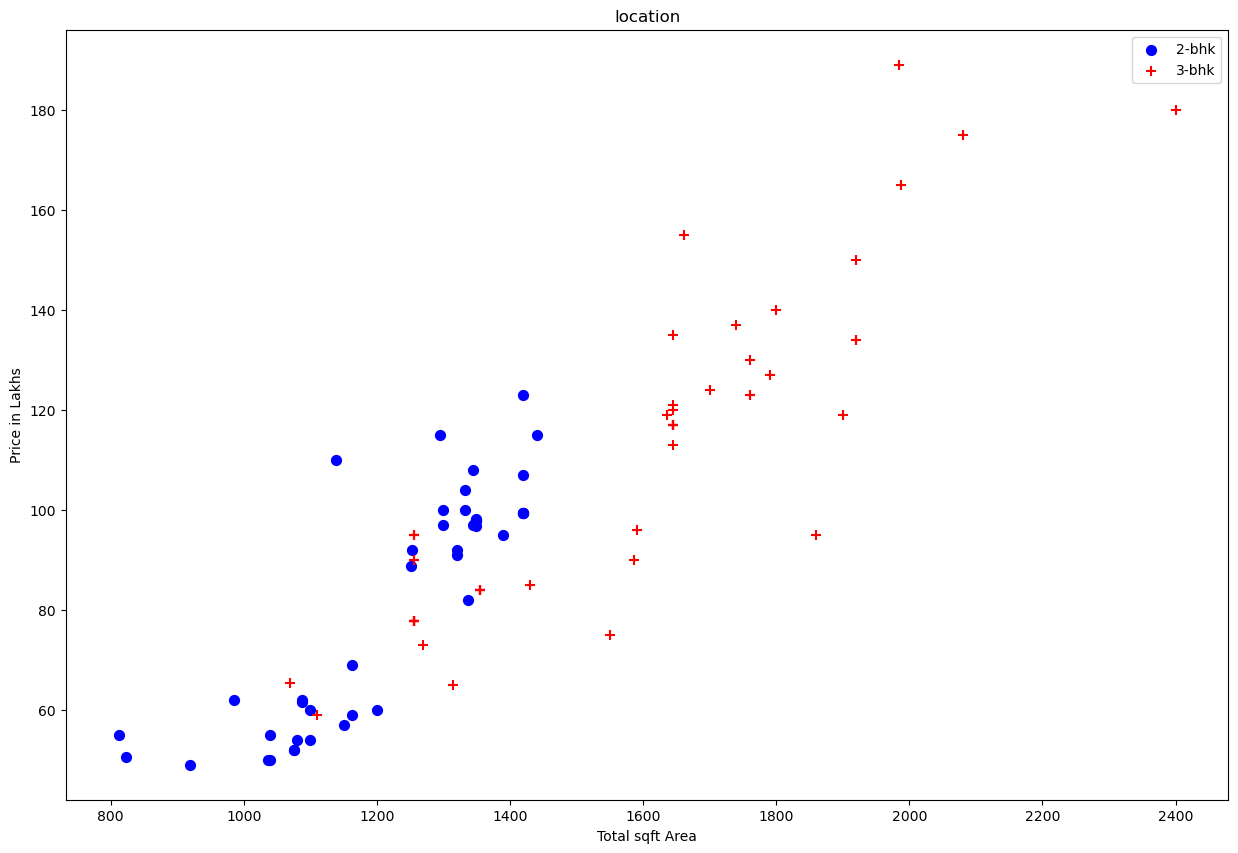

In [89]:
scatter_plot(df9,"Hebbal")

In [90]:
df10=df9.copy()
df10.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_bhk
0,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,43.333333
1,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522,62.500000
2,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667,55.666667
3,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667,17.000000
4,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996,52.333333


In [91]:
# Here there are few houses in which the bathrooms are greater than bedrooms which is practically not possible so these kind of
# data-points are treated as outliers so we will be removinng these outliers from the dataset
df11=df10[df10['bath']<(df10['bhk']+1)]
df11.shape

(9106, 8)

In [92]:
df12=df11.drop(['size','price_per_sqft','price_per_bhk'],axis='columns')
df12

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1200.0,2.0,130.00,3
1,1st Phase JP Nagar,2825.0,4.0,250.00,4
2,1st Phase JP Nagar,1875.0,3.0,167.00,3
3,1st Phase JP Nagar,1500.0,5.0,85.00,5
4,1st Phase JP Nagar,2024.0,3.0,157.00,3
...,...,...,...,...,...
9471,other,1256.0,2.0,65.00,2
9472,other,1353.0,2.0,110.00,2
9473,other,812.0,1.0,26.00,1
9474,other,1440.0,2.0,63.93,3


In [93]:
df13=df12.drop('price',axis='columns')
y=df12.price

# Encoding the data

In [94]:
dummies=pd.get_dummies(df13.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
df14=pd.concat([df13,dummies],axis='columns')

In [96]:
df14.head()

,location,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,1200.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,2825.0,4.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1875.0,3.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1500.0,5.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2024.0,3.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X=df14.drop(['location','other'],axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2825.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500.0,5.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,1256.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9472,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9473,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9474,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
y

0       130.00
1       250.00
2       167.00
3        85.00
4       157.00
         ...  
9471     65.00
9472    110.00
9473     26.00
9474     63.93
9475     48.00
Name: price, Length: 9106, dtype: float64

# Spliting into Traning and Testing data

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# ML Model

In [100]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [101]:
regressor.score(X_test,y_test)

0.7534101529674627

# Validation Score

In [110]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
splits=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
validation_score=cross_val_score(LinearRegression(),X,y,cv=splits)
validation_score.mean()

0.7547260657468288

# R2-Score

In [111]:
from sklearn.metrics import r2_score
r2_score(regressor.predict(X_test),y_test)

0.6715968875311429